In [89]:
# # Install the PyDrive wrapper & import libraries.
# # This only needs to be done once per notebook.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
from __future__ import absolute_import
from __future__ import division
from numpy import mean
from numpy import std
from matplotlib import pyplot
import numpy as np
import pandas as pd
import math 
import itertools
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras import regularizers
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

In [0]:
def load_data():
  fashion_mnist = keras.datasets.fashion_mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  return(train_images,train_labels,test_images,test_labels)

In [0]:
def examine_dimensions(train_images,test_images,train_labels):
  print("Train shape",train_images.shape)
  print("Test shape",test_images.shape)

In [0]:
def examine_null(train_images,test_images):
  print("Null Values train set",np.isnan(train_images).any().sum())
  print("Null values test set",np.isnan(test_images).any().sum())

In [0]:
def test_train_split(train_images,train_labels):
  x_train,x_val,y_train,y_val=train_test_split(train_images,train_labels,test_size=0.2,random_state=42)#check
  return(x_train,x_val,y_train,y_val)

In [0]:
def reshaping_images(x_train,x_val,test_images):
  x_train=x_train.reshape(-1,28,28,1)
  x_val=x_val.reshape(-1,28,28,1)
  test_images=test_images.reshape(-1,28,28,1)
  return(x_train,x_val,test_images)

In [0]:
def normalization(x_train,x_val,test_images):
  x_train=x_train.astype("float32")/255
  x_val=x_val.astype("float32")/255
  test_images=test_images.astype("float32")/255
  return(x_train,x_val,test_images)

In [0]:
def one_hot(y_train,y_val,test_labels):
  y_train=to_categorical(y_train,num_classes=10)
  y_val=to_categorical(y_val,num_classes=10)
  test_labels=to_categorical(test_labels,num_classes=10)
  return(y_train,y_val,test_labels)

In [0]:
def cnn_model():
  model=Sequential()
  model.add(Conv2D(filters=16,kernel_size=[3,3],padding='same', activation='relu', data_format='channels_last', input_shape=(28,28,1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(filters=32,kernel_size=[3,3],padding='same', activation='relu', data_format='channels_last'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(filters=64,kernel_size=[3,3],padding='same', activation='relu', data_format='channels_last', input_shape=(28,28,1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(filters=128,kernel_size=[3,3],padding='same', activation='relu', data_format='channels_last'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(filters=256,kernel_size=[3,3],padding='same', activation='relu', data_format='channels_last', input_shape=(28,28,1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(filters=512,kernel_size=[3,3],padding='same', activation='relu', data_format='channels_last'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  
  #model.add(Conv2D(filters=64, kernel_size=[3,3], activation='relu', strides=1, padding='same', data_format='channels_last'))
  #model.add(Dropout(0.25))
  #model.add(Conv2D(filters=128, kernel_size=[3,3], activation='relu', strides=1, padding='same', data_format='channels_last'))
  #model.add(Conv2D(filters=256, kernel_size=[3,3], activation='relu', strides=1, padding='same', data_format='channels_last'))
  #model.add(Dropout(0.25))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.25))
 
  model.add(Flatten())
  
  model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.5))
  #model.add(Dense(256, activation='relu'))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.4))
  #model.add(Dense(128, activation='relu'))
  #model.add(BatchNormalization())
  #model.add(Dropout(0.5))
            
  model.add(Dense(10, activation='softmax'))
  optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
  model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
  model.summary()
  
  return(model)

In [0]:
def data_aug(x_train):
  datagen = ImageDataGenerator(
  rotation_range = 8,
  zoom_range=0.1,
  shear_range=0.3,
  width_shift_range=0.08,
  height_shift_range=0.08,
  vertical_flip=True)
  datagen.fit(x_train)
  return(datagen)

Train shape (60000, 28, 28)
Test shape (10000, 28, 28)
Null Values train set 0
Null values test set 0
(48000, 28, 28)
<class 'keras.preprocessing.image.ImageDataGenerator'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_69 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_70 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_80 (Dropout)         (None,

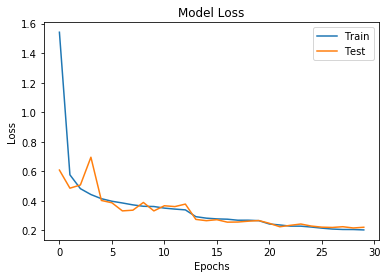

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_75 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_76 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_83 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 14, 14, 64)        18496     
__________

In [113]:
def main():
  train_images,train_labels,test_images,test_labels=load_data()
  
  examine_dimensions(train_images,test_images,train_labels)
  
  examine_null(train_images,test_images)
  
  x_train,x_val,y_train,y_val=test_train_split(train_images,train_labels)
  
  print(x_train.shape)
  x_train = np.reshape(x_train, (-1, 28, 28, 1))
  
  test_images = np.reshape(test_images, (-1, 28, 28, 1))
  
  x_train,x_val,test_images=reshaping_images(x_train,x_val,test_images)
  
  x_train,x_val,test_images=normalization(x_train,x_val,test_images)
  
  y_train,y_val,test_labels=one_hot(y_train,y_val,test_labels)
  
#   x_train = np.reshape(x_train)
  
  datagen = data_aug(x_train)
  print(type(datagen))
  
  model=cnn_model()
  batch_size = 128
  epochs = 30
  learning_rate_reduction = ReduceLROnPlateau(moniter='val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)
  ES = EarlyStopping(monitor='val_loss', min_delta=0,patience=5,verbose=1,mode='auto',baseline=None, restore_best_weights=False)
  
  model_save_name = 'classifier.json'
  path = F"/content/gdrive/My Drive/{model_save_name}"
  mcp_save = ModelCheckpoint(path, save_best_only=True, monitor='val_loss', mode='min')
  
  model1 = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                                validation_data = (x_val, y_val), verbose=1, callbacks = [learning_rate_reduction, ES, mcp_save],
                                steps_per_epoch=x_train.shape[0] // batch_size)
                                #callbacks = [reduce_lr])
 
  model.save("my_model.h5")
  score=model.evaluate(test_images, test_labels)
  
  print('Loss: {:.4f}'.format(score[0]))
  print('Accuracy: {:.4f}'.format(score[1]))
  #plotting the loss curves
  plt.plot(model1.history['loss'])
  plt.plot(model1.history['val_loss'])
  plt.title("Model Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Test'])
  plt.show()
  
  plt.plot(model1.history['acc'])
  plt.plot(model1.history['val_acc'])
  plt.title("Model Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()
  
  model=cnn_model()
  model.load_weights(path)

  score = model.evaluate(test_images, test_labels, verbose=1)
  print('Test loss with loaded model:', score[0])
  print('Test accuracy with loaded model:', score[1]*100)

if  __name__=='__main__':
  main()